In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense # type: ignore
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"..\data\phishing_detector_ml_df.csv")

In [3]:
X = df.drop(columns=["result"])
y = df["result"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
def save_model(model, model_path):
    """Save trained model using pickle."""
    with open(model_path, "wb") as file:
        pickle.dump(model, file)
    print(f"\n Model saved at: {model_path}")
    
# Model Training & Evaluation Function
def train_and_evaluate(model, model_name):
    print(f"\n Training {model_name}...\n")
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="binary", pos_label=1)
    recall = recall_score(y_test, y_pred, average="binary", pos_label=1)
    class_report = classification_report(y_test, y_pred)
    
    # Cross Validation Score
    cross_val = cross_val_score(model, X_train, y_train, cv=5).mean()
    
    print(f"{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Cross Validation Score: {cross_val:.4f}")
    print("\nClassification Report:\n", class_report)
    
    print(" Saving model...")
    save_model(model, rf"..\saved_models\{model_name}.pkl")
    
    return model

In [6]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate(rf_model, "Random_Forest")


 Training Random_Forest...

Random_Forest Results:
Accuracy: 0.9270
Precision: 0.9279
Recall: 0.9260
Cross Validation Score: 0.9280

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      1000
           1       0.93      0.93      0.93      1000

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000

 Saving model...

 Model saved at: ..\saved_models\Random_Forest.pkl


RandomForestClassifier(random_state=42)

In [13]:
#  Train XGBoost
xgb_model = XGBClassifier(eval_metric="logloss")
train_and_evaluate(xgb_model, "XGBoost")


 Training XGBoost...

XGBoost Results:
Accuracy: 0.9240
Precision: 0.9198
Recall: 0.9290
Cross Validation Score: 0.9325

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      1000
           1       0.92      0.93      0.92      1000

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

 Saving model...

 Model saved at: ..\saved_models\XGBoost.pkl


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [16]:
# Train Logistic Regression
log_reg_model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000)
train_and_evaluate(log_reg_model, "LogisticRegression")


 Training LogisticRegression...

LogisticRegression Results:
Accuracy: 0.8205
Precision: 0.8280
Recall: 0.8090
Cross Validation Score: 0.8000

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1000
           1       0.83      0.81      0.82      1000

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000

 Saving model...

 Model saved at: ..\saved_models\LogisticRegression.pkl


LogisticRegression(max_iter=1000, solver='liblinear')

In [17]:
# Train Decision Tree
decision_tree_model = DecisionTreeClassifier(criterion="gini", max_depth=10, random_state=42)
train_and_evaluate(decision_tree_model, "DecisionTree")


 Training DecisionTree...

DecisionTree Results:
Accuracy: 0.9165
Precision: 0.9407
Recall: 0.8890
Cross Validation Score: 0.9165

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      1000
           1       0.94      0.89      0.91      1000

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

 Saving model...

 Model saved at: ..\saved_models\DecisionTree.pkl


DecisionTreeClassifier(max_depth=10, random_state=42)

In [18]:
# Train SVM
svm_model = SVC(kernel="rbf", probability=True)
train_and_evaluate(svm_model, "SVM")


 Training SVM...

SVM Results:
Accuracy: 0.8185
Precision: 0.8201
Recall: 0.8160
Cross Validation Score: 0.8021

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1000
           1       0.82      0.82      0.82      1000

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000

 Saving model...

 Model saved at: ..\saved_models\SVM.pkl


SVC(probability=True)

In [20]:
# Train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate(knn_model, "KNN")


 Training KNN...

KNN Results:
Accuracy: 0.8175
Precision: 0.8068
Recall: 0.8350
Cross Validation Score: 0.8174

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81      1000
           1       0.81      0.83      0.82      1000

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000

 Saving model...

 Model saved at: ..\saved_models\KNN.pkl


KNeighborsClassifier()

In [21]:
# Train Naïve Bayes model
nb_model = GaussianNB(var_smoothing=1e-8)
train_and_evaluate(nb_model, "Naive_Bayes")


 Training Naive_Bayes...

Naive_Bayes Results:
Accuracy: 0.7755
Precision: 0.7377
Recall: 0.8550
Cross Validation Score: 0.7568

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.70      0.76      1000
           1       0.74      0.85      0.79      1000

    accuracy                           0.78      2000
   macro avg       0.78      0.78      0.77      2000
weighted avg       0.78      0.78      0.77      2000

 Saving model...

 Model saved at: ..\saved_models\Naive_Bayes.pkl


GaussianNB(var_smoothing=1e-08)

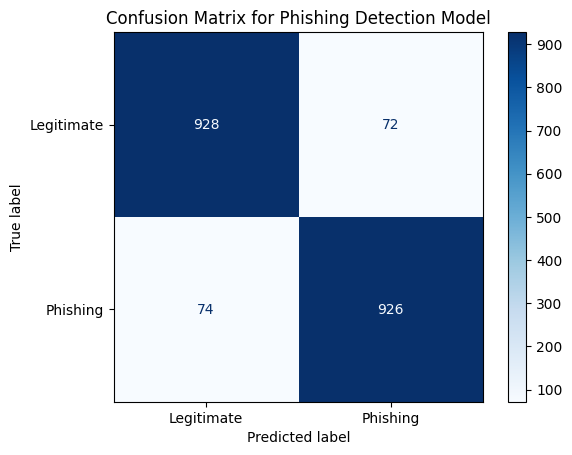

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_true = y_test
y_pred = rf_model.predict(X_test)  # Use your trained model
y_pred = rf_model.predict(X_test)
y_pred = [1 if p > 0.5 else 0 for p in y_pred]
cm = confusion_matrix(y_true, y_pred)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Legitimate", "Phishing"])
disp.plot(cmap="Blues")

# Save the figure
plt.title("Confusion Matrix for Phishing Detection Model")
plt.savefig("confusion_matrix.png")  # Saves as an image file
plt.show()

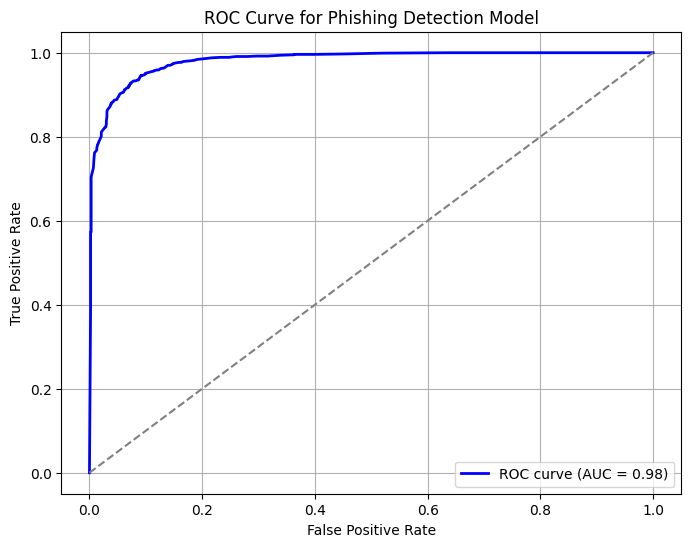

In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
y_scores = rf_model.predict_proba(X_test)[:, 1]  # Probability of phishing (1)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Phishing Detection Model')
plt.legend(loc='lower right')
plt.grid()
plt.show()


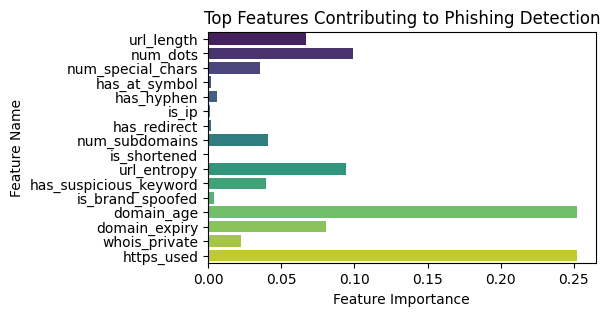

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train contains features and y_train contains labels
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get feature importance
importance = model.feature_importances_
features = X_train.columns

# Plot
plt.figure(figsize=(5, 3))
sns.barplot(x=importance, y=features, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Top Features Contributing to Phishing Detection")
plt.show()


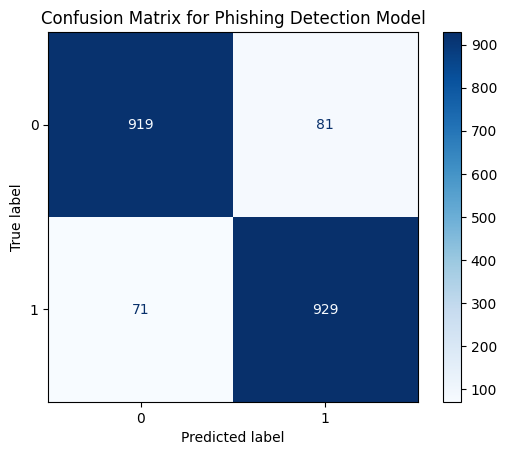

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = xgb_model.predict(X_test)

# Assuming y_pred contains the model predictions and y_test contains actual labels
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Phishing Detection Model")
plt.show()

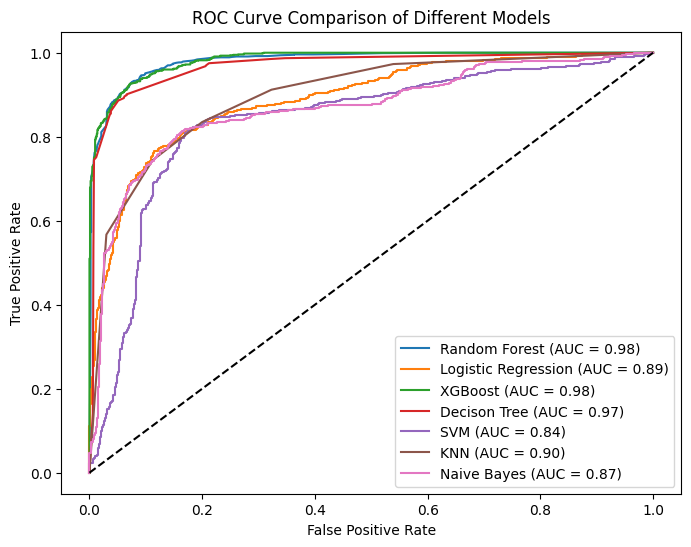

In [22]:
models = {
    "Random Forest": rf_model,
    "Logistic Regression": log_reg_model,
    "XGBoost": xgb_model,
    "Decison Tree": decision_tree_model,
    "SVM": svm_model,
    "KNN": knn_model,
    "Naive Bayes": nb_model
}

from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

for model_name, model in models.items():  # Assuming 'models' is a dictionary of trained models
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison of Different Models")
plt.legend(loc="lower right")
plt.show()